# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we consider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two random variables, denoting age and weight, respectively.
Consider a random sample of size $n=20$ from these two variables

In [3]:
X = np.array([69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
Y = np.array([153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140, 150, 165, 185, 210, 220])

**a)** Find the mean, median and mode for $X$  

In [4]:
# Mean 
n    = X.shape[0]
mean = X.sum() / n

# Median
X_     = np.sort(X)
median = X_[n//2]

# Mode
U, cnt = np.unique(X, return_counts=True)
mode   = U[np.argmax(cnt)]

print("- " * 27)
print("Own implementation:")
print("Mean: %.4f \tMedian: %.4f \tMode: %.4f" % (mean, median, mode))

print()
print("- " * 27)
mean   = X.mean()
median = np.median(X)
mode   = scipy.stats.mode(X)[0]

print("Numpy / scipy implementation:")
print("Mean: %.4f \tMedian: %.4f \tMode: %.4f" % (mean, median, mode))


- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Own implementation:
Mean: 71.4500 	Median: 72.0000 	Mode: 74.0000

- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Numpy / scipy implementation:
Mean: 71.4500 	Median: 71.5000 	Mode: 74.0000


**b)** What is the variance for $Y$?  

In [12]:
mean_y = Y.mean()
var_y  = ((Y-mean_y)**2).sum() / n

print("- " * 15)
print("Own implementation:")
print("Variance: %.4f" % var_y)

print()
print("- " * 15)
print("Numpy implementation:")
print("Variance: %.4f" % Y.var())

- - - - - - - - - - - - - - - 
Own implementation:
Variance: 2738.4200

- - - - - - - - - - - - - - - 
Numpy implementation:
Variance: 1369.2100


**c)** What is the probability of observing an age of 80 or higher?  

In [6]:
# Probability mass function solution:
# num_80s / total_num
n80  = X[X==80].sum()
prob = n80 / n

print("- " * 15)
print("Probability Mass Function:")
print("p(X=80) = %.2f%%" % (prob*100))

print()
print("- " * 15)
prob = 1-scipy.stats.norm.cdf(80, X.mean(), np.std(X))

print("Probability Density Function:")
print("p(X=80) = %.2f%%" % (prob*100))

- - - - - - - - - - - - - - - 
Probability Mass Function:
p(X=80) = 0.00%

- - - - - - - - - - - - - - - 
Probability Density Function:
p(X=80) = 1.08%


**d)** Plot the normal distribution for $X$  

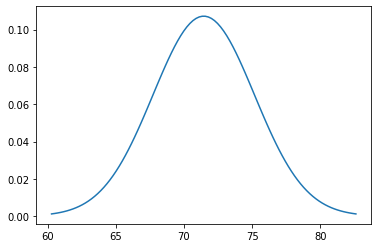

In [7]:
x_mean = X.mean()
x_std  = X.std()

mi = x_mean - 3*x_std
ma = x_mean + 3*x_std
x  = np.linspace(mi, ma, 100)
y  = scipy.stats.norm.pdf(x, x_mean, x_std)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

In [8]:
# TODO
XY   = np.c_[X, Y] # Concatenate X and Y to a matrix of shape [20, 2] 
mean = np.sum(XY, axis=0, keepdims=True) / n
cov  = ((XY-mean).T @ (XY-mean)) / (n-1)

print("- " * 15)
print("Own implementation:")
print("Mean: %s\nCovariance: \n%s" % (mean, cov))

print()
print("- " * 15)
mean = XY.mean(0)
cov  = np.cov(XY.T)

print("Numpy implementation:")
print("Mean: %s\nCovariance: \n%s" % (mean, cov))

- - - - - - - - - - - - - - - 
Own implementation:
Mean: [[ 71.45 164.7 ]]
Covariance: 
[[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]

- - - - - - - - - - - - - - - 
Numpy implementation:
Mean: [ 71.45 164.7 ]
Covariance: 
[[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]


**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

In [9]:
mi  = XY.min(0, keepdims=True)
ma  = XY.max(0, keepdims=True)

XY_ = (XY - mi) / (ma - mi)

mi  = XY_.min(0, keepdims=True)
ma  = XY_.max(0, keepdims=True)

assert np.allclose(np.zeros_like(mi), mi)
assert np.allclose(np.ones_like(ma), ma)

**g)** Normalize the data with _standard score normalization_, such that is has mean 0 and standard deviation 1.  


In [10]:
mean = XY.mean(0, keepdims=True)
std  = XY.std(0, keepdims=True)

XY_  = (XY - mean) / std

mean = XY_.mean(0, keepdims=True)
std  = XY_.std(0, keepdims=True)

assert np.allclose(np.zeros_like(mean), mean)
assert np.allclose(np.ones_like(std), std)

## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers
 - Median is robust against outliers
 - Standard deviation is robust against outliers

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust. 

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 

## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

![Table 3.11](graphics/3.11.png)

Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes . Include the marginal counts.  
**b)** Compute the $\chi^2$ statistic between them.  
**c)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

![Table 3.10](graphics/3.10.png)

In [11]:
X = np.array([
    [2, 4, 0],
    [1, 1, 2],
])

n      = np.sum(X)
X1_cnt = X.sum(0, keepdims=True)
X1_P   = X1_cnt / n
X2_cnt = X.sum(1, keepdims=True)
X2_P   = X2_cnt / n

E_cnts = X1_P * X2_P * n
Chi_sq = (((X - E_cnts)**2) / E_cnts).sum()

m2, m1 = X.shape
deg_fr = (m1 - 1) * (m2 - 1)

print("P")

print("Expected counts \n", E_cnts)
print("Chi squared: %.4f \tDegrees of freedom: %i" % (Chi_sq, deg_fr))

print("\nScipy imiplementation:")
print("Chi square: %.4f \tP-value: %.4f \tDegrees of freedom: %i \t Expected counts: \n%s" % scipy.stats.chi2_contingency(X))

# Conclusion is that since P-value is > 0.05, we fail to reject the null-hypothesis.

P
Expected counts 
 [[1.8 3.  1.2]
 [1.2 2.  0.8]]
Chi squared: 3.8889 	Degrees of freedom: 2

Scipy imiplementation:
Chi square: 3.8889 	P-value: 0.1431 	Degrees of freedom: 2 	 Expected counts: 
[[1.8 3.  1.2]
 [1.2 2.  0.8]]


## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances? 
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$? 

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. If we know that the correlation between $X$
and $Y$ is zero, what can you infer about the values of $Y$?

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|

# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

![Table 3.9](graphics/3.9.png)

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.
**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

![Table 3.11](graphics/3.11.png)

